In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
dataset = pd.read_csv("/FinalAmravati Crop and fertilizer dataset.csv")

In [59]:
dataset

,Taluka_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,Amravati,Black,75,50,100,6.5,1000,20,Orange,Urea
1,Amravati,Black,80,50,100,6.5,1000,20,Orange,Urea
2,Amravati,Black,85,50,100,6.5,1000,20,Orange,Urea
3,Amravati,Black,90,50,100,6.5,1000,20,Orange,Urea
4,Amravati,Black,95,50,100,6.5,1000,20,Orange,Urea
...,...,...,...,...,...,...,...,...,...,...
4508,Chandur Bazar,Black,130,80,150,7.0,1400,30,Orange,MOP
4509,Chandur Bazar,Black,135,80,150,7.0,1400,30,Orange,MOP
4510,Chandur Bazar,Black,140,80,150,7.0,1400,30,Orange,MOP
4511,Chandur Bazar,Black,145,80,150,7.0,1400,30,Orange,MOP


In [60]:
dataset.isnull().sum()

,0
Taluka_Name,0
Soil_color,0
Nitrogen,0
Phosphorus,0
Potassium,0
pH,0
Rainfall,0
Temperature,0
Crop,0
Fertilizer,0


In [61]:
dataset.shape

(4513, 10)

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Taluka_Name  4513 non-null   object 
 1   Soil_color   4513 non-null   object 
 2   Nitrogen     4513 non-null   int64  
 3   Phosphorus   4513 non-null   int64  
 4   Potassium    4513 non-null   int64  
 5   pH           4513 non-null   float64
 6   Rainfall     4513 non-null   int64  
 7   Temperature  4513 non-null   int64  
 8   Crop         4513 non-null   object 
 9   Fertilizer   4513 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 352.7+ KB


In [63]:
dataset.duplicated().sum()

np.int64(0)

In [64]:
dataset.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


In [65]:
numeric_dataset = dataset.select_dtypes(include=['number'])
corr = numeric_dataset.corr()
display(corr)

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
Nitrogen,1.000000,0.709539,0.584315,0.182850,0.269364,-0.010213
Phosphorus,0.709539,1.000000,0.573970,0.244945,0.225453,-0.055303
Potassium,0.584315,0.573970,1.000000,0.075110,0.445671,0.053413
pH,0.182850,0.244945,0.075110,1.000000,0.097884,-0.002949
Rainfall,0.269364,0.225453,0.445671,0.097884,1.000000,0.315045
Temperature,-0.010213,-0.055303,0.053413,-0.002949,0.315045,1.000000


<Axes: >

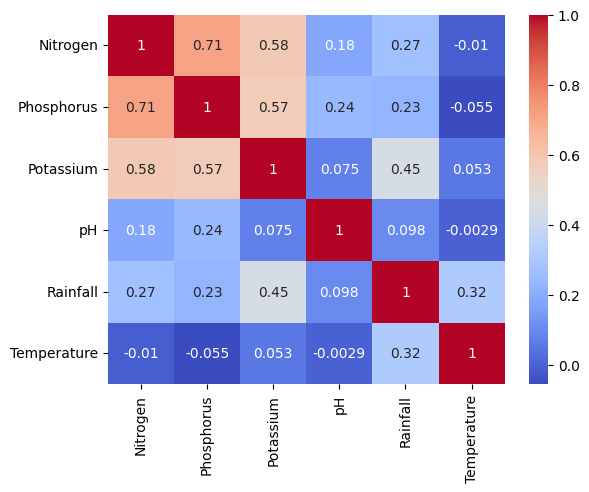

In [66]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')

Importing libraries that required for main implementation

In [67]:
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [71]:
taluka_widget = widgets.Combobox(
    placeholder='Choose Taluka',
    options=tuple(dataset['Taluka_Name'].unique()),
    description='Select Taluka:',
    ensure_option=True,
    disabled=False
)

soil_color_widget = widgets.Combobox(
    placeholder='Select Soil Color of region',
    options=tuple(dataset['Soil_color'].unique()),
    description='Soil Color:',
    ensure_option=True
)

nitrogen_widget = widgets.Combobox(
    description= "Nitrogen:",
    placeholder='Select Nitrogen',
    ensure_option=True,
)

phosphorus_widget = widgets.Combobox(
    description= "Phosphorus:",
    placeholder='Select Phosphorus',
    ensure_option=True,
)

potassium_widget = widgets.Combobox(
    description= "Potassium:",
    placeholder='Select Potassium',
    ensure_option=True,
)

ph_widget = widgets.Combobox(
    description= "pH:",
    placeholder='Select pH',
    ensure_option=True,
)

rainfall_widget = widgets.Combobox(
    description= "Rainfall:",
    placeholder='Select Rainfall',
    ensure_option=True,
)

temperature_widget = widgets.Combobox(
    description= "Temperature:",
    placeholder='Select Temperature',
    ensure_option=True,
)

recommend_widget = widgets.Output()

# Define the observer function to update soil color options
def update_soil_color_options(change):
    taluka = change.new
    if taluka:
        soil_colors = dataset[dataset['Taluka_Name'] == taluka]['Soil_color'].unique()
        soil_color_widget.options = tuple(soil_colors)
    else:
        soil_color_widget.options = ()

# Define the observer function to update nitrogen options
def update_nitrogen_options(change):
    taluka = taluka_widget.value
    soil_color = soil_color_widget.value
    if taluka and soil_color:
        nitrogen_values = dataset[(dataset['Taluka_Name'] == taluka) & (dataset['Soil_color'] == soil_color)]['Nitrogen'].unique()
        nitrogen_widget.options = tuple(str(value) for value in nitrogen_values)  # Convert to Unicode strings
    else:
        nitrogen_widget.options = ()

# Define the observer function to update phosphorus options
def update_phosphorus_options(change):
    taluka = taluka_widget.value
    soil_color = soil_color_widget.value
    if taluka and soil_color:
        phosphorus_values = dataset[(dataset['Taluka_Name'] == taluka) & (dataset['Soil_color'] == soil_color)]['Phosphorus'].unique()
        phosphorus_widget.options = tuple(str(value) for value in phosphorus_values)  # Convert to Unicode strings
    else:
        phosphorus_widget.options = ()

def update_potassium_options(change):
    taluka = taluka_widget.value
    soil_color = soil_color_widget.value
    if taluka and soil_color:
        potassium_values = dataset[(dataset['Taluka_Name'] == taluka) & (dataset['Soil_color'] == soil_color)]['Potassium'].unique()
        potassium_widget.options = tuple(str(value) for value in potassium_values)  # Convert to Unicode strings
    else:
        potassium_widget.options = ()

def update_ph_options(change):
    taluka = taluka_widget.value
    soil_color = soil_color_widget.value
    if taluka and soil_color:
        ph_values = dataset[(dataset['Taluka_Name'] == taluka) & (dataset['Soil_color'] == soil_color)]['pH'].unique()
        ph_widget.options = tuple(str(value) for value in ph_values) # Convert to Unicode strings
    else:
        ph_widget.options = ()

def update_rainfall_options(change):
    taluka = taluka_widget.value
    soil_color = soil_color_widget.value
    if taluka and soil_color:
        rainfall_values = dataset[(dataset['Taluka_Name'] == taluka) & (dataset['Soil_color'] == soil_color)]['Rainfall'].unique()
        rainfall_widget.options = tuple(str(value) for value in rainfall_values) # Convert to Unicode strings
    else:
        rainfall_widget.options = ()

def update_temperature_options(change):
    taluka = taluka_widget.value
    soil_color = soil_color_widget.value
    if taluka and soil_color:
        temperature_values = dataset[(dataset['Taluka_Name'] == taluka) & (dataset['Soil_color'] == soil_color)]['Temperature'].unique()
        temperature_widget.options = tuple(str(value) for value in temperature_values) # Convert to Unicode strings
    else:
        temperature_widget.options = ()

# Train the model
def train_model(change):
    # Get the selected values from the combo boxes
    taluka = taluka_widget.value
    soil_color = soil_color_widget.value
    nitrogen = float(nitrogen_widget.value)
    phosphorus = float(phosphorus_widget.value)
    potassium = float(potassium_widget.value)
    pH = float(ph_widget.value)
    rainfall = float(rainfall_widget.value)
    temperature = float(temperature_widget.value)

    input_data = pd.DataFrame(
        [[nitrogen, phosphorus, potassium, pH, rainfall, temperature, taluka, soil_color]],
        columns=['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'Taluka_Name', 'Soil_color']
    )

    # Perform one-hot encoding for District_Name and Soil_color columns
    encoder = OneHotEncoder(handle_unknown='ignore')
    X_encoded = encoder.fit_transform(dataset[['Taluka_Name', 'Soil_color']])
    input_data_encoded = encoder.transform(input_data[['Taluka_Name', 'Soil_color']])

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, dataset['Crop'], test_size=0.2, random_state=42)

    # Train the Random Forest model
    model_crop = RandomForestClassifier(n_estimators=100, random_state=42)
    model_crop.fit(X_train, y_train)

    #Make predictions
    predicted_crop = model_crop.predict(input_data_encoded)

    # Find the fertilizer associated with the recommended crop
    recommended_fertilizer = dataset[dataset['Crop'] == predicted_crop[0]]['Fertilizer'].values[0]
    with recommend_widget:
        recommend_widget.clear_output()
        print("Recommended Crop:", predicted_crop[0])
        print("Recommended Fertilizer:", recommended_fertilizer)


# Define the observer function to update soil color options
taluka_widget.observe(update_soil_color_options, names='value')
taluka_widget.observe(update_nitrogen_options, names='value')
soil_color_widget.observe(update_nitrogen_options, names='value')

taluka_widget.observe(update_phosphorus_options, names='value')
soil_color_widget.observe(update_phosphorus_options, names='value')

taluka_widget.observe(update_potassium_options, names='value')
soil_color_widget.observe(update_potassium_options, names='value')

taluka_widget.observe(update_ph_options, names='value')
soil_color_widget.observe(update_ph_options, names='value')

taluka_widget.observe(update_rainfall_options, names='value')
soil_color_widget.observe(update_rainfall_options, names='value')

taluka_widget.observe(update_temperature_options, names='value')
soil_color_widget.observe(update_temperature_options, names='value')

#create button widget
button = widgets.Button(description="Recommend Crop and Fertilizer")
button.on_click(train_model)

display(widgets.VBox([
    taluka_widget,
    soil_color_widget,
    nitrogen_widget,
    phosphorus_widget,
    potassium_widget,
    ph_widget,
    rainfall_widget,
    temperature_widget]))

display(button)

Button(description='Recommend Crop and Fertilizer', style=ButtonStyle())

In [75]:
display(recommend_widget)

Output()